# Scikit-Learn

### **Introduction to Scikit-Learn (sklearn)**
Scikit-learn (`sklearn`) is one of the most widely used **machine learning libraries** in Python. It provides a simple and efficient way to build machine learning models and handle data preprocessing tasks. It is built on top of **NumPy, SciPy, and Matplotlib**, making it easy to integrate into financial applications.

---

### **🌟 Why Use Scikit-Learn in Finance?**
1. **Preprocessing Tools** – Includes normalization, feature selection, and handling missing data.
2. **ML Models** – Supports regression, classification, clustering, and dimensionality reduction.
3. **Pipeline & Automation** – Helps in structuring machine learning workflows efficiently.
4. **Evaluation Metrics** – Provides functions to assess model performance.
5. **Interoperability** – Works well with **pandas**, **NumPy**, and other Python libraries.

---

### **🛠️ Key Components of Scikit-Learn**
Scikit-learn is organized into several modules:

#### 1️⃣ **Preprocessing**
- **Scaling & Normalization** (`StandardScaler`, `MinMaxScaler`)
- **Imputation (Handling Missing Data)** (`SimpleImputer`, `KNNImputer`)
- **Feature Selection & Engineering** (`PolynomialFeatures`, `SelectKBest`)

#### 2️⃣ **Supervised Learning (Regression & Classification)**
- **Regression Models** (`LinearRegression`, `Lasso`, `Ridge`, `RandomForestRegressor`)
- **Classification Models** (`LogisticRegression`, `SVM`, `RandomForestClassifier`, `XGBoost`)


#### 3️⃣ **Model Selection & Evaluation**
- **Train/Test Splitting** (`train_test_split`)
- **Cross-Validation** (`cross_val_score`)
- **Metrics** (`accuracy_score`, `r2_score`, `roc_auc_score`)

####  4️⃣ **Pipeline & Automation**
- **Automating ML Workflows** (`Pipeline`)
- **Hyperparameter Tuning** (`GridSearchCV`, `RandomizedSearchCV`)



## **📌 Next Steps**
We will go step by step, covering:
1. **Data Preprocessing** (Imputation, Normalization, Feature Engineering)
2. **Building ML Models** (Regression, Classification)
3. **Using Pipelines for Automation**


## Preprocessing

### **Why Do We Need Data Preprocessing?**
**Data preprocessing** is one of the most important steps in a machine learning pipeline because real-world financial data is often **incomplete, inconsistent, and noisy**. If raw data is fed into a machine learning model without proper preprocessing, the model may **fail to generalize** and produce poor predictions.

---





#### 1️⃣ **Handling Missing Data**
- Financial datasets often have missing values due to market closures, reporting delays, or technical issues.
- Some  Models cannot handle missing values.
- Solutions:
  - **Imputation** (Mean, Median, Mode, KNN)
  - **Removing missing data** (if the percentage is small)


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Sample dataset with missing values
data = pd.DataFrame({
    'Stock Price': [100, 102, np.nan, 98, 97],
    'Volume': [1000, np.nan, 1200, 1300, 900]
})

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print(data_imputed)

   Stock Price  Volume
0       100.00  1000.0
1       102.00  1100.0
2        99.25  1200.0
3        98.00  1300.0
4        97.00   900.0



####  2️⃣ **Scaling and Normalization**
- Financial data often has features on **different scales** (e.g., stock price in hundreds, volume in millions).
- Models like **Logistic Regression, SVM, KNN** are sensitive to feature scales.
- Solutions:
  - **Standardization (`StandardScaler`)** – Centers data at zero with unit variance.
  - **Normalization (`MinMaxScaler`)** – Rescales values to [0,1] or [-1,1].



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = pd.DataFrame({
    'Stock Price': [100, 200, 300, 400, 500],
    'Volume': [1000, 2000, 3000, 4000, 5000]
})

# Standardization
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Normalization
normalizer = MinMaxScaler()
data_normalized = pd.DataFrame(normalizer.fit_transform(data), columns=data.columns)

print("Standardized Data:\n", data_scaled)
print("Normalized Data:\n", data_normalized)

Standardized Data:
    Stock Price    Volume
0    -1.414214 -1.414214
1    -0.707107 -0.707107
2     0.000000  0.000000
3     0.707107  0.707107
4     1.414214  1.414214
Normalized Data:
    Stock Price  Volume
0         0.00    0.00
1         0.25    0.25
2         0.50    0.50
3         0.75    0.75
4         1.00    1.00


####  3️⃣ **Feature Engineering (Creating New Features)**
- Helps capture more useful **patterns** in the data.
- Examples in finance:

  - **Polynomial & Interaction Terms** for non-linear relationships.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Sample dataset with price and volume change
data = pd.DataFrame({
    'Price Change (%)': [1.5, -0.8, 2.3, -1.2, 0.5, 1.0, -0.4, 1.8],
    'Volume Change (%)': [10, 30, 40, 50, 20, 15, 25, 30],
    'Target': [1, 0, 1, 0, 1, 1, 0, 1]  # 1 = Price Up, 0 = Price Down
})

# Split into features (X) and target (y)
X = data[['Price Change (%)', 'Volume Change (%)']]
y = data['Target']

# Apply Polynomial Features (degree=2 to include interaction)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


In [ ]:
X_poly

array([[ 1.50e+00,  1.00e+01,  2.25e+00,  1.50e+01,  1.00e+02],
       [-8.00e-01,  3.00e+01,  6.40e-01, -2.40e+01,  9.00e+02],
       [ 2.30e+00,  4.00e+01,  5.29e+00,  9.20e+01,  1.60e+03],
       [-1.20e+00,  5.00e+01,  1.44e+00, -6.00e+01,  2.50e+03],
       [ 5.00e-01,  2.00e+01,  2.50e-01,  1.00e+01,  4.00e+02],
       [ 1.00e+00,  1.50e+01,  1.00e+00,  1.50e+01,  2.25e+02],
       [-4.00e-01,  2.50e+01,  1.60e-01, -1.00e+01,  6.25e+02],
       [ 1.80e+00,  3.00e+01,  3.24e+00,  5.40e+01,  9.00e+02]])


####  4️⃣ **Encoding Categorical Data**
- In financial datasets, categorical features like **sector type, stock category, or country** need to be converted into numerical values.
- Solutions:
  - **One-Hot Encoding** (`OneHotEncoder`) – Converts categorical values into binary columns.
  - **Label Encoding** (`LabelEncoder`) – Assigns a numerical code to each category.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Sample categorical data
data = pd.DataFrame({'Sector': ['Tech', 'Finance', 'Healthcare', 'Tech', 'Finance']})

# One-Hot Encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data).toarray()

print(encoded_data)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


## Supervised Learning

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target



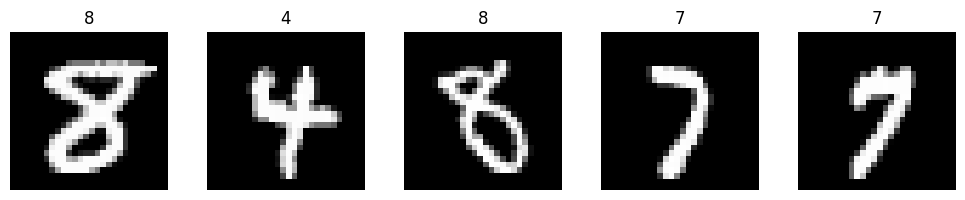

In [ ]:
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)
indices = rng.choice(len(X), size=5, replace=False)
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for ax, idx in zip(axes, indices):
    ax.imshow(X[idx].reshape(28, 28), cmap='gray', interpolation='nearest')
    ax.set_title(str(y[idx]))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Convert target labels to integers
y = y.astype(int)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better performance with linear models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize multinomial logistic regression
multinomial_clf = LogisticRegression(
    multi_class='ovr',
    max_iter=1000,       # increase if solver does not converge
    random_state=42,
    n_jobs=-1            # parallelize across cores
)

# Train the model
multinomial_clf.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = multinomial_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Multinomial Logistic Regression): {accuracy:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (Multinomial Logistic Regression): 0.9151


In [ ]:
from sklearn.linear_model import SGDClassifier

# Fast linear logistic classifier via SGD (log loss = logistic)
clf = SGDClassifier(
    loss='log_loss',           # logistic regression
    max_iter=1000,             # upper cap
    tol=1e-3,                  # stop when improvement < tol
    early_stopping=True,       # use an internal validation split and stop early
    n_iter_no_change=5,
    validation_fraction=0.1,   # fraction of train set used for early stopping
    random_state=42,
    verbose=0
)

# Fit (fast)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy (SGDClassifier, fast):", accuracy_score(y_test, y_pred))



Accuracy (SGDClassifier, fast): 0.8596428571428572


### Random feature

## Pipeline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample dataset with numerical and categorical features
data = pd.DataFrame({
    'Age': [25, 30, np.nan, 40, 35, 50, np.nan, 60],
    'Salary': [50000, 60000, 55000, np.nan, 80000, 75000, 90000, np.nan],
    'City': ['NY', 'SF', 'LA', 'SF', 'NY', 'LA', 'NY', 'SF'],
    'Target': [1, 0, 1, 0, 1, 1, 0, 1]
})

# Splitting into features (X) and target (y)
X = data.drop(columns=['Target'])
y = data['Target']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining numerical and categorical columns
num_features = ['Age', 'Salary']
cat_features = ['City']

# Creating transformers
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformations
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Creating final pipeline with Logistic Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression( random_state=42, max_iter=1000))
])

# Training pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Pipeline Model Accuracy (Logistic Regression): {accuracy:.2f}')


Pipeline Model Accuracy (Logistic Regression): 0.67


# Ridge and Lasso Regression



## **1. Introduction**
Linear regression is a fundamental technique in **quantitative finance** for modeling relationships between financial indicators and future stock returns. In this lecture, we apply:

- **Ordinary Least Squares (OLS)** to estimate feature importance.
- **Ridge Regression** to control overfitting.
- **Lasso Regression** to perform feature selection.

The objective is to predict **next-day returns** using technical indicators.

---

## **2. Define Features and Target**
We define our independent variables (**X**) as technical indicators and past returns. The dependent variable (**y**) is the **next-day return**.




In [ ]:
features = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal' , 'Return',
            'Lag_Return_1', 'Lag_Return_2', 'Lag_Return_3']
X = appl[features]
y = appl['Tomorrow_Return']


In [ ]:
split_point = int(0.75 * len(X))

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [ ]:
import statsmodels.api as sm

# Add intercept term
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

# Fit OLS model
model_ols = sm.OLS(y_train, X_train_ols).fit()

# Display regression results
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:        Tomorrow_Return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.087
Date:                Fri, 12 Sep 2025   Prob (F-statistic):              0.367
Time:                        15:21:38   Log-Likelihood:                 10353.
No. Observations:                3732   AIC:                        -2.068e+04
Df Residuals:                    3720   BIC:                        -2.061e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0006      0.001      0.416   

## Ridge regression

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.18758e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


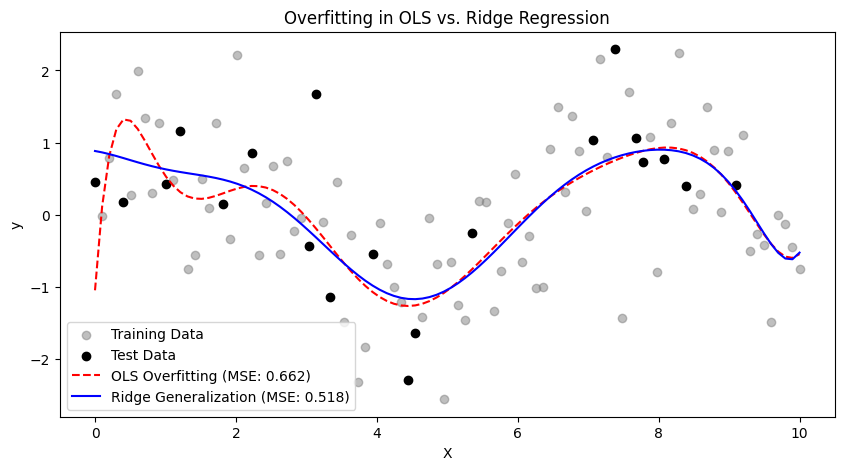

In [ ]:
# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Generate synthetic dataset (non-linear relationship)
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.9, size=X.shape[0])  # Add noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit an overfitting OLS model (high-degree polynomial regression)
degree = 10  # High-degree polynomial to show overfitting
ols_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)

# Create and fit a Ridge regression model
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))  # Regularization with alpha=1
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Compute Mean Squared Errors (MSE) for comparison
ols_mse = np.mean((y_test - y_pred_ols) ** 2)
ridge_mse = np.mean((y_test - y_pred_ridge) ** 2)

# Generate fine-grained X values for smooth plotting
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)

# Predict on the full range for smoother visualization
y_plot_ols = ols_model.predict(X_plot)
y_plot_ridge = ridge_model.predict(X_plot)

# Plot results correctly
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='gray', alpha=0.5, label="Training Data")
plt.scatter(X_test, y_test, color='black', label="Test Data")
plt.plot(X_plot, y_plot_ols, color='red', linestyle='dashed', label=f"OLS Overfitting (MSE: {ols_mse:.3f})")
plt.plot(X_plot, y_plot_ridge, color='blue', linestyle='solid', label=f"Ridge Generalization (MSE: {ridge_mse:.3f})")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Overfitting in OLS vs. Ridge Regression")
plt.show()


## Why Lasso Tends to Produce More Zeros Than Ridge

### Regularization in Lasso and Ridge

- **Lasso Regression (L1 Regularization):**
  - Uses the L1 norm of the coefficients as the penalty:  $$\text{Penalty}_{\text{Lasso}} = \lambda \sum_{j=1}^{p} |\beta_j| $$  

  - The gradient (or subgradient) with respect to a coefficient $\beta_j$ is given by:

    $$ \frac{\partial}{\partial \beta_j} \lambda |\beta_j| = \lambda \cdot \text{sgn}(\beta_j) $$

    where $ \text{sgn}(\beta_j) $ is the sign function:

    - $+1$ if $\beta_j > 0$
    - $-1$ if $\beta_j < 0$
    - Undefined at $\beta_j = 0$ (handled via subgradient methods)
  - **Key Point:** The gradient is **constant in magnitude** (i.e., it does not depend on the size of $\beta_j$). This means that even if $\beta_j$ is very small, the same constant force is applied to push it towards zero.

- **Ridge Regression (L2 Regularization):**
  - Uses the L2 norm squared of the coefficients as the penalty: $$ \text{Penalty}_{\text{Ridge}} = \lambda \sum_{j=1}^{p} \beta_j^2 $$
   

  - The gradient with respect to $\beta_j$ is:
  $$ \frac{\partial}{\partial \beta_j} \lambda \beta_j^2 = 2\lambda \beta_j  $$
    
  - **Key Point:** The gradient is **proportional to the magnitude** of $\beta_j$. Larger coefficients are penalized more strongly, but small coefficients receive a very small push towards zero.

### How This Affects Sparsity

- **Lasso Regression:**
  - Because the gradient (or penalty force) is constant regardless of the magnitude of $\beta_j$ , even small coefficients can be driven exactly to zero.
  - This results in a **sparse solution**, where many coefficients are exactly zero, effectively performing feature selection.

- **Ridge Regression:**
  - Since the gradient depends on $\beta_j$'s magnitude, the shrinkage effect is **more pronounced on larger coefficients**.
  - Small coefficients are shrunk less aggressively, so they rarely become exactly zero.
  - This results in a model where all predictors are retained (although their contributions might be small), leading to **non-sparse** solutions.


# Factor Investing with the Fama–French 3-Factor Model

## 1. Introduction

**Factor investing** is an investment strategy that targets specific drivers of return across asset classes. Instead of selecting individual securities, investors build portfolios tilted toward characteristics (or “factors”) that have historically driven returns. One of the most prominent models in this area is the **Fama–French 3-Factor Model**, which extends the Capital Asset Pricing Model (CAPM) by adding two additional factors:

- **SMB (Small Minus Big):** Captures the size effect—the outperformance of small-cap stocks over large-cap stocks.
- **HML (High Minus Low):** Captures the value effect—the tendency for stocks with high book-to-market ratios (value stocks) to outperform those with low ratios (growth stocks).

Our strategy will use these factors to analyze and construct portfolios from an S&P 500 dataset. We will also employ mathematical rigor to explain the steps and rationale behind factor-based investing.

---

## 2. The Fama–French 3-Factor Model

### 2.1 Model Specification

The model is specified as:

$$
R_{it} - R_{ft} = \alpha_i + \beta_{i,\text{MKT}} (R_{mt} - R_{ft}) + \beta_{i,\text{SMB}} \cdot \text{SMB}_t + \beta_{i,\text{HML}} \cdot \text{HML}_t + \epsilon_{it}
$$

Where:
- $R_{it}$: Return of asset $i$ at time $t$.
- $R_{ft}$: Risk-free rate at time $t$.
- $R_{mt}$: Market return at time $t$.
- $\alpha_i$: The asset's abnormal return (alpha).
- $\beta_{i,\text{MKT}}$: Sensitivity of asset $i$ to the market risk premium.
- $\beta_{i,\text{SMB}}$: Sensitivity to the size factor (SMB).
- $\beta_{i,\text{HML}}$: Sensitivity to the value factor (HML).
- $\epsilon_{it}$: The error term.

### 2.2 Interpretation of Coefficients

- **$\beta_{i,\text{MKT}}$**: How much the asset’s return moves with the overall market.
- **$\beta_{i,\text{SMB}}$**: Indicates if the asset behaves more like small-cap stocks (if positive) or large-cap stocks (if negative).
- **$\beta_{i,\text{HML}}$**: Indicates if the asset leans towards value stocks (if positive) or growth stocks (if negative).

---

## 3. Data Preparation and Estimation

### 3.1 Data Sources

- **S&P 500 Dataset:** Contains historical returns, market capitalization, book-to-market ratios, etc.
- **Fama–French Factors:** Often available from [Kenneth French’s Data Library](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).

### 3.2 Estimation Procedure

1. **Merge Datasets:** Align the S&P 500 asset data with the Fama–French factor returns by time period.
2. **Excess Returns Calculation:**

   $$
   \text{Excess Return}_i = R_{it} - R_{ft}
   $$

3. **Regression Analysis:** For each asset $i$, run the regression:

   $$
   \text{Excess Return}_i = \alpha_i + \beta_{i,\text{MKT}} \cdot (R_{mt} - R_{ft}) + \beta_{i,\text{SMB}} \cdot \text{SMB}_t + \beta_{i,\text{HML}} \cdot \text{HML}_t + \epsilon_{it}
   $$

   - **Objective:** Estimate the factor loadings ($\beta$s) that explain the variation in asset returns.
   - **Method:** Ordinary Least Squares (OLS) is typically used.

4. **Factor Exposure Analysis:** Evaluate how each asset’s returns are explained by its exposure to the three factors.

---

## 4. Constructing the Factor Investing Strategy

### 4.1 Defining the Strategy

The goal is to tilt the portfolio towards factors that are expected to deliver superior returns. Here are a few steps to do this:

1. **Screening Assets:**
   - Identify assets with high sensitivity ($\beta$) to the factors that are expected to perform well.
   - For instance, if historical data suggests a premium for small-cap (SMB) and value (HML) stocks, look for assets with high $\beta_{SMB}$ and $\beta_{HML}$.

2. **Portfolio Construction:**
   - **Long Positions:** Build long positions in stocks with high exposures to SMB and HML.
   - **Short Positions or Underweighting:** Consider short positions or underweighting stocks that show negative or low exposures to these factors.
   - **Weighting Scheme:** You might use factor loadings as weights, subject to constraints (such as risk or turnover constraints).

3. **Risk Management:**
   - **Diversification:** Ensure that the portfolio is diversified across sectors and industries.
   - **Regular Rebalancing:** Re-estimate the factor loadings periodically and adjust the portfolio weights accordingly.

### 4.2 Mathematical Formulation of the Portfolio

Let:
- $w_i$ be the weight of asset $i$ in the portfolio.
- $\boldsymbol{\beta}_i = \begin{bmatrix} \beta_{i,\text{MKT}} \\ \beta_{i,\text{SMB}} \\ \beta_{i,\text{HML}} \end{bmatrix}$.

The portfolio’s factor exposure is then:

$$
\boldsymbol{\beta}_p = \sum_{i=1}^{N} w_i \boldsymbol{\beta}_i
$$

**Objective:** Choose $\{w_i\}$ such that $\boldsymbol{\beta}_p$ aligns with the desired factor tilts (e.g., overweight SMB and HML) while managing risk.

**Possible Optimization Problem:**

$$
\begin{aligned}
\text{Maximize:} \quad & \boldsymbol{\beta}_p^\top \mathbf{f} - \lambda \cdot \sigma_p^2 \\
\text{Subject to:} \quad & \sum_{i=1}^{N} w_i = 1 \\
& w_i \geq 0 \quad \text{(if only long positions)} \\
\end{aligned}
$$

Where:
- $\mathbf{f}$ is the vector of expected factor premiums.
- $\sigma_p^2$ is the portfolio variance.
- $\lambda$ is the risk-aversion parameter.

### 4.3 Implementation Steps

1. **Estimate Factor Loadings:** For each S&P 500 stock, run the regression to obtain $\beta_{i,\text{MKT}}, \beta_{i,\text{SMB}}, \beta_{i,\text{HML}}$.
2. **Determine Desired Exposure:** Based on historical premiums or current market outlook, decide on the target portfolio exposure $\boldsymbol{\beta}_p^*$.
3. **Optimization:** Solve the optimization problem to find the asset weights $\{w_i\}$ that achieve the target exposure while minimizing risk.
4. **Backtesting:** Validate the strategy using historical data to assess performance, turnover, and drawdowns.
5. **Rebalancing Frequency:** Choose a rebalancing frequency (e.g., monthly, quarterly) to update the factor loadings and adjust the portfolio accordingly.



In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, Union, Tuple, List, Any, Optional
import plotly.graph_objects as go
import pickle
path = '/content/drive/MyDrive/Teaching/Math 628 - Fall 2025/ticker_data_dict.pkl'
with open(path, 'rb') as file:
    loaded_dict = pickle.load(file)

appl = loaded_dict['AAPL']

In [ ]:


import pandas as pd

# Load the data with skiprows
df = pd.read_csv('/content/drive/MyDrive/Math 628/week 4/F-F_Research_Data_Factors_weekly.csv', skiprows=4)
# Try to convert the first column to datetime while handling non-date values
df_cleaned = df[pd.to_numeric(df.iloc[:, 0], errors='coerce').notna()]

# Convert the cleaned column to datetime format
df_cleaned.iloc[:, 0] = pd.to_datetime(df_cleaned.iloc[:, 0].astype(int), format='%Y%m%d')


df_cleaned

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,1926-07-02 00:00:00,1.60,-0.62,-0.83,0.056
1,1926-07-10 00:00:00,0.36,-0.88,0.31,0.056
2,1926-07-17 00:00:00,1.01,0.59,-1.44,0.056
3,1926-07-24 00:00:00,-2.05,0.10,-0.18,0.056
4,1926-07-31 00:00:00,3.04,-1.82,-0.90,0.056
...,...,...,...,...,...
5134,2024-11-29 00:00:00,0.95,0.57,-0.62,0.099
5135,2024-12-06 00:00:00,1.04,-0.20,-3.03,0.092
5136,2024-12-13 00:00:00,-0.93,-0.80,-0.16,0.092
5137,2024-12-20 00:00:00,-2.28,-1.52,-1.42,0.092


In [ ]:
df_cleaned.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RF']

In [ ]:
appl.reset_index(inplace=True)
appl['Date'] = pd.to_datetime(appl['Date'])

In [ ]:
weakly = appl.resample('W-FRI', on='Date').last()
weakly = weakly.dropna()
weakly = weakly['Close'].pct_change().dropna()

weakly

,Close
Date,
2005-11-25,0.074040
2005-12-02,0.047447
2005-12-09,0.023406
2005-12-16,-0.043320
2005-12-23,0.031501
...,...
2025-08-01,-0.053768
2025-08-08,0.133264
2025-08-15,0.010913


In [ ]:
# prompt: make df_cleaned and weakly data data type same

import pandas as pd
# Convert 'Date' column in df_cleaned to datetime if it's not already
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Convert 'Date' column in weakly to datetime if it's not already
weakly = weakly.reset_index()
weakly['Date'] = pd.to_datetime(weakly['Date'])


df_cleaned['Date'] = df_cleaned['Date'].dt.date
weakly['Date'] = weakly['Date'].dt.date


# Merge the DataFrames using 'Date' as the key
merged_df = pd.merge(df_cleaned, weakly, on='Date', how='inner')

merged_df


,Date,Mkt-RF,SMB,HML,RF,Close
0,2005-11-25,1.56,0.03,-0.22,0.078,0.074040
1,2005-12-02,-0.12,1.21,0.28,0.079,0.047447
2,2005-12-09,-0.44,0.27,0.20,0.079,0.023406
3,2005-12-16,0.36,-1.22,-0.66,0.079,-0.043320
4,2005-12-23,0.10,0.26,-0.09,0.079,0.031501
...,...,...,...,...,...,...
960,2024-11-29,0.95,0.57,-0.62,0.099,0.032453
961,2024-12-06,1.04,-0.20,-3.03,0.092,0.023217
962,2024-12-13,-0.93,-0.80,-0.16,0.092,0.021784
963,2024-12-20,-2.28,-1.52,-1.42,0.092,0.025632


In [ ]:
import pandas as pd
import statsmodels.api as sm





merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# 1. Filter the data for dates before 2024
df_reg = merged_df[merged_df['Date'] < pd.Timestamp('2024-01-01')]


y = df_reg['Close'] * 100 -  df_reg['RF']
X = df_reg[['Mkt-RF' , 'HML' , 'SMB']]
X = sm.add_constant(X)

# 3. Run the OLS regression
model = sm.OLS(y, X, missing='drop').fit()

# Print the regression summary
print(model.summary())

# 4. Extract the beta (the coefficient on Mkt_RF)
beta = model.params['Mkt-RF']



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     201.6
Date:                Fri, 12 Sep 2025   Prob (F-statistic):          3.19e-100
Time:                        15:30:15   Log-Likelihood:                -2414.2
No. Observations:                 914   AIC:                             4836.
Df Residuals:                     910   BIC:                             4856.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3276      0.113      2.903      0.0

## Computing Beta for each stock

This section of code calculates beta coefficients for multiple financial tickers by first resampling each ticker’s daily closing prices to a weekly frequency (using Friday as the reference point) and computing the week-over-week percentage change. It then merges these returns with a pre-cleaned dataset based on matching dates, filters the data to include only dates before January 1, 2023, and computes a dependent variable \( y \) defined as the scaled closing price minus the risk-free rate. Using independent variables such as the market excess return, HML, and SMB factors (with an added constant), an Ordinary Least Squares (OLS) regression is performed for each ticker. The resulting regression parameters (beta coefficients) are stored in a list, with error handling implemented to catch and print any tickers that cause issues during the regression.


In [ ]:
beta_results = []
split = pd.Timestamp('2022-01-01')
for ticker in loaded_dict.keys():
  df = loaded_dict[ticker].reset_index()
  weakly = df.resample('W-FRI', on='Date').last()
  weakly = weakly.dropna()
  weakly = weakly['Close'].pct_change().dropna()

  weakly = weakly.reset_index()
  weakly['Date'] = pd.to_datetime(weakly['Date'])

  weakly['Date'] = weakly['Date'].dt.date


  # Merge the DataFrames using 'Date' as the key
  merged_df = pd.merge(df_cleaned, weakly, on='Date', how='inner')
  merged_df['Date'] = pd.to_datetime(merged_df['Date'])


  df_reg = merged_df[merged_df['Date'] < split]


  y = df_reg['Close'] * 100 -  df_reg['RF']
  X = df_reg[['Mkt-RF' , 'HML' , 'SMB']]
  X = sm.add_constant(X)

  # 3. Run the OLS regression

  try :
    model = sm.OLS(y, X, missing='drop').fit()
    params = model.params.to_dict()
    params['Ticker'] = ticker
    beta_results.append(params)
  except :
    print(ticker)



CEG
GEHC
GEV
KVUE
SOLV
VLTO


In [ ]:
beta_df = pd.DataFrame(beta_results)
beta_df

,const,Mkt-RF,HML,SMB,Ticker
0,0.004071,0.836146,0.163830,-0.047030,MMM
1,0.215107,0.997876,0.273451,0.528462,AOS
2,0.126551,0.758903,-0.419326,-0.435426,ABT
3,0.118374,1.005204,-0.182147,-0.225624,ABBV
4,0.184132,0.930269,-0.200575,0.107063,ACN
...,...,...,...,...,...
491,0.077539,1.097931,0.356527,-0.052450,XYL
492,0.094094,0.888865,-0.007292,-0.135498,YUM
493,0.141184,1.175956,-0.141602,0.430707,ZBRA
494,-0.056899,0.900905,0.046936,0.059835,ZBH


## Finding target beta

This code segment performs a mean-variance optimization using Fama-French factor data to construct a composite factor with minimized variance while meeting a specified weekly return target. It begins by preparing the data: converting dates, filtering for dates before 2023, and selecting the relevant Fama factors ('Mkt-RF', 'HML', 'SMB'). The sample mean and covariance of the weekly returns are computed, and a weekly return target of 0.2% is set. Using the convex optimization library CVXPY, an optimization problem is formulated to minimize the portfolio variance (defined as a quadratic form of the weights and the covariance matrix) subject to constraints on the expected return and bounds on the weights. Once solved, the optimal weights for each factor are determined and applied to the dataset to calculate a composite factor time series.


In [ ]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

# --- Step 1: Prepare the Fama Factor Data ---
# Assume df_cleaned contains weekly data with columns: 'Date', 'Mkt-RF', 'HML', 'SMB', etc.
df_fama = df_cleaned.copy()
df_fama['Date'] = pd.to_datetime(df_fama['Date'])
# Filter to data before 2023
df_fama = df_fama[df_fama['Date'] < split]

# Select the factor columns (assumed to be weekly returns)
factors = ['Mkt-RF', 'HML', 'SMB']
factor_data = df_fama[factors]

# Convert factor returns to a numpy array for computation
returns = factor_data.values

# Compute the sample mean and covariance of the factor returns (weekly)
mu = np.mean(returns, axis=0)       # weekly expected return for each factor
Sigma = np.cov(returns, rowvar=False)


weekly_target = 10 / 50  # This is 0.002 or 0.2% per week

n = len(factors)
w = cp.Variable(n)

# Define the portfolio (composite factor) variance
portfolio_variance = cp.quad_form(w, Sigma)

constraints = [
    mu @ w >= weekly_target,  # composite expected weekly return >= 0.10/50
    w >= -1.5,
    w <= 1.5
]

# Set up and solve the optimization problem: minimize variance subject to the constraints.
problem = cp.Problem(cp.Minimize(portfolio_variance), constraints)
problem.solve()

# Get the optimal weights
optimal_weights = w.value

# Display the optimal weights for each factor
opt_weights_df = pd.DataFrame({
    'Factor': factors,
    'Optimal Weight': optimal_weights
})
print("Optimal weights from mean-variance optimization (weekly target):")
print(opt_weights_df)

df_fama['Target_Factor'] = df_fama[factors].dot(optimal_weights)



Optimal weights from mean-variance optimization (weekly target):
   Factor  Optimal Weight
0  Mkt-RF        0.707678
1     HML        0.955082
2     SMB        0.584041


## Optimal weight for Factor investing

This code snippet builds and optimizes a portfolio by aligning its factor exposures with a predefined target while minimizing variance. It starts by resampling individual stock data into weekly returns for selected tickers, ensuring consistency by using an inner join on common dates, and computing the covariance matrix of these returns. Next, it extracts the factor loadings (betas) for these stocks and defines the portfolio's target factor exposures based on previously computed optimal weights from a mean-variance optimization. Using CVXPY, the script formulates an optimization problem where the objective is to minimize the portfolio variance, subject to constraints such as full investment (weights sum to one), matching the portfolio's factor loadings to the target values, and bounds on individual weights. Finally, it solves the problem, prints the optimization status and results, and verifies that the portfolio’s factor exposures meet the target.


In [ ]:

factors = ['Mkt-RF', 'HML', 'SMB']
selected_tickers = set()
# For each factor, select the 10 stocks with the largest absolute beta
for fac in factors:
    top10 = beta_df.reindex(beta_df[fac].abs().sort_values(ascending=False).index).head(10)
    selected_tickers = selected_tickers.union(set(top10['Ticker']))

selected_tickers = list(selected_tickers)
print(f"Selected tickers (total {len(selected_tickers)}): {selected_tickers}")



Selected tickers (total 27): ['MS', 'FITB', 'COIN', 'MRNA', 'TRGP', 'KEY', 'ABNB', 'LVS', 'CRWD', 'UBER', 'MGM', 'PLTR', 'BX', 'COF', 'HBAN', 'RF', 'ENPH', 'C', 'WFC', 'TTD', 'HIG', 'CZR', 'URI', 'BLDR', 'UAL', 'XYZ', 'BAC']


In [ ]:

weekly_returns_dict = {}

for ticker in selected_tickers:
    df = loaded_dict[ticker].copy()
    # Ensure 'Date' is datetime
    df.reset_index(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    # Resample to weekly frequency (using last observation on Friday)
    weekly = df.resample('W-FRI', on='Date').last().dropna()

        # Compute weekly returns as percentage change in Close
    wr = weekly['Close'].pct_change().dropna()
    # Set Date as index
    wr = wr.reset_index()
    wr['Date'] = pd.to_datetime(wr['Date'])
    wr = wr[wr['Date'] < split]
    wr.set_index('Date', inplace=True)
    # Save in dictionary (rename series to ticker)
    weekly_returns_dict[ticker] = wr['Close']

# Merge all weekly return series on common dates (inner join)
weekly_returns = pd.concat(weekly_returns_dict, axis=1, join='inner')

# Drop any rows with missing data
weekly_returns.dropna(inplace=True)

print("Weekly returns head:")
print(weekly_returns.head())



Weekly returns head:
                  MS      FITB      COIN      MRNA      TRGP       KEY  \
Date                                                                     
2021-07-02  0.041063 -0.019995  0.072058  0.065291 -0.011256 -0.025400   
2021-07-09 -0.018472 -0.009365  0.054669 -0.006359  0.005357 -0.026544   
2021-07-16  0.010185 -0.044118 -0.113715  0.230317 -0.082371 -0.040654   
2021-07-23  0.036164 -0.017033 -0.000400  0.217854  0.028792 -0.012920   
2021-07-30  0.022575  0.014254  0.051841  0.013674 -0.007326  0.029320   

                ABNB       LVS      CRWD      UBER  ...         C       WFC  \
Date                                                ...                       
2021-07-02  0.003742  0.007403 -0.002567 -0.000387  ... -0.015933 -0.028245   
2021-07-09 -0.003927 -0.032787  0.046914 -0.051054  ... -0.027837 -0.025738   
2021-07-16 -0.102446 -0.068381 -0.054757 -0.058692  ... -0.022644  0.008427   
2021-07-23  0.032909 -0.042869  0.076012  0.027495  ... -0.002840

In [ ]:
# Compute the covariance matrix of weekly returns for selected stocks
Sigma = weekly_returns.cov().values


beta_subset = beta_df[beta_df['Ticker'].isin(selected_tickers)].copy()
beta_subset = beta_subset.set_index('Ticker').loc[weekly_returns.columns, factors]
B = beta_subset.values  # shape: (number of stocks, number of factors)


target_beta = opt_weights_df['Optimal Weight'].values

n = len(selected_tickers)
w = cp.Variable(n)

# The portfolio factor loading is B^T * w (a vector of length 3)
portfolio_factor_loading = B.T @ w

# Optimization objective: minimize portfolio variance (w^T Sigma w)
objective = cp.Minimize(cp.quad_form(w, Sigma))

# Constraints:
constraints = [
    cp.sum(w) == 1,                      # Fully invested portfolio
    portfolio_factor_loading == target_beta,  # Target factor exposures exactly
    w >= -1,                             # Each weight between -1 and 1
    w <= 1
]

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Check the status and optimal value
print("Optimization status:", prob.status)
print("Optimal portfolio variance:", prob.value)

# Get the optimal weights
optimal_weights = w.value
opt_weights_df = pd.DataFrame({
    'Ticker': selected_tickers,
    'Weight': optimal_weights
})
print("Optimized portfolio weights:")
print(opt_weights_df)

# -------------
# (Optional) STEP 5: Check the Portfolio Factor Loadings
# -------------
portfolio_loading = (B.T @ optimal_weights).flatten()
for fac, pl in zip(factors, portfolio_loading):
    print(f"Portfolio loading for {fac}: {pl:.4f} (target: {target_beta[factors.index(fac)]:.4f})")

Optimization status: optimal
Optimal portfolio variance: 1.680707742208541e-05
Optimized portfolio weights:
   Ticker    Weight
0      MS  0.796754
1    FITB  1.000000
2    COIN  0.036719
3    MRNA  0.049893
4    TRGP  0.279840
5     KEY -0.448133
6    ABNB -0.111905
7     LVS  0.111276
8    CRWD  0.152135
9    UBER  0.111704
10    MGM -0.178694
11   PLTR  0.216645
12     BX -0.199203
13    COF -0.280220
14   HBAN  0.133339
15     RF  0.462970
16   ENPH  0.031990
17      C -0.201953
18    WFC  0.071211
19    TTD  0.099337
20    HIG  0.400691
21    CZR -0.293099
22    URI -0.171387
23   BLDR  0.011670
24    UAL  0.126211
25    XYZ -0.207791
26    BAC -1.000000
Portfolio loading for Mkt-RF: 0.7077 (target: 0.7077)
Portfolio loading for HML: 0.9551 (target: 0.9551)
Portfolio loading for SMB: 0.5840 (target: 0.5840)


## Result

Weekly returns after 2022 (first few rows):
                  MS      FITB      COIN      MRNA      TRGP       KEY  \
Date                                                                     
2022-01-14 -0.049688  0.033811 -0.009900 -0.042692  0.033446  0.025047   
2022-01-21 -0.000202 -0.107235 -0.165457 -0.218141 -0.040325 -0.082192   
2022-01-28  0.036915 -0.012656 -0.074960 -0.003748  0.051459  0.013715   
2022-02-04  0.022691  0.064538  0.094943  0.022198  0.053667  0.041385   
2022-02-11  0.004418  0.025349  0.000463 -0.010367  0.049132  0.001911   

                ABNB       LVS      CRWD      UBER  ...         C       WFC  \
Date                                                ...                       
2022-01-14 -0.012406  0.134301 -0.065030  0.000000  ...  0.017483  0.060069   
2022-01-21 -0.044271  0.017678 -0.067742 -0.134185  ... -0.054684 -0.075611   
2022-01-28 -0.089070 -0.014628  0.025314 -0.020312  ...  0.022444  0.009689   
2022-02-04  0.089585  0.025284  0.049201  

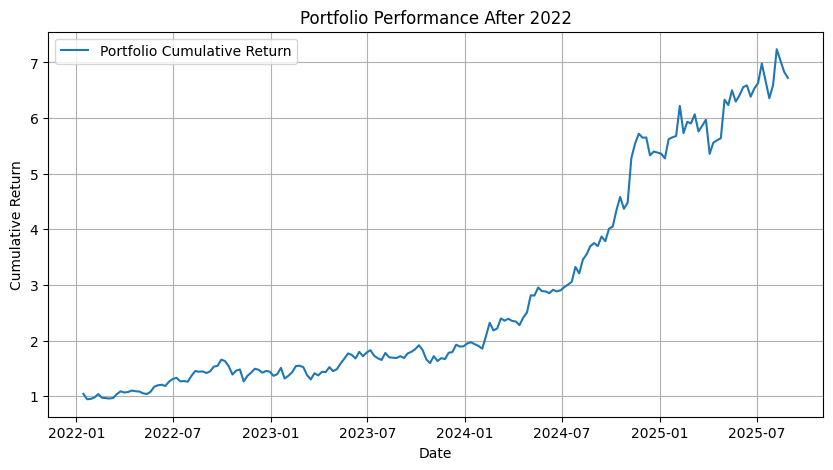

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


weekly_returns_after_dict = {}

# For each selected ticker, compute weekly returns for dates on or after 2022-01-01.
for ticker in selected_tickers:
    df = loaded_dict[ticker].copy()
    df.reset_index(inplace=True)
    # Ensure 'Date' is datetime and filter for after 2022-01-01
    df['Date'] = pd.to_datetime(df['Date'])
    df_post2022 = df[df['Date'] >= split]

    if df_post2022.empty:
        print(f"No post-2022 data for ticker {ticker}.")
        continue

    # Resample to weekly frequency using the last observation on Friday
    weekly = df_post2022.resample('W-FRI', on='Date').last().dropna()

    # Compute weekly percentage returns from the 'Close' price
    wr = weekly['Close'].pct_change().dropna()

    # Reset index so that Date becomes a column and then set it as index again
    wr = wr.reset_index()
    wr['Date'] = pd.to_datetime(wr['Date'])
    wr.set_index('Date', inplace=True)

    # Save the weekly returns series in our dictionary (column named by ticker)
    weekly_returns_after_dict[ticker] = wr['Close']

# Merge the individual series into a single DataFrame (inner join on Date)
weekly_returns_after = pd.concat(weekly_returns_after_dict, axis=1, join='inner')
weekly_returns_after.dropna(inplace=True)

print("Weekly returns after 2022 (first few rows):")
print(weekly_returns_after.head())


weekly_returns_after = weekly_returns_after[selected_tickers]

# Convert optimal_weights to a Series (if not already) for easier multiplication.
weights_series = pd.Series(optimal_weights, index=selected_tickers)

# Compute the portfolio return for each week as the weighted sum of individual returns.
portfolio_returns = weekly_returns_after.dot(weights_series)


cumulative_returns = (1 + portfolio_returns).cumprod()

# Plot the cumulative portfolio performance
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio Performance After 2022')
plt.legend()
plt.grid(True)
plt.show()




## Beat the Market? Let's open a hedge fund!

/tmp/ipython-input-2410563712.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download(sp500_ticker, start="2022-01-01")
[*********************100%***********************]  1 of 1 completed


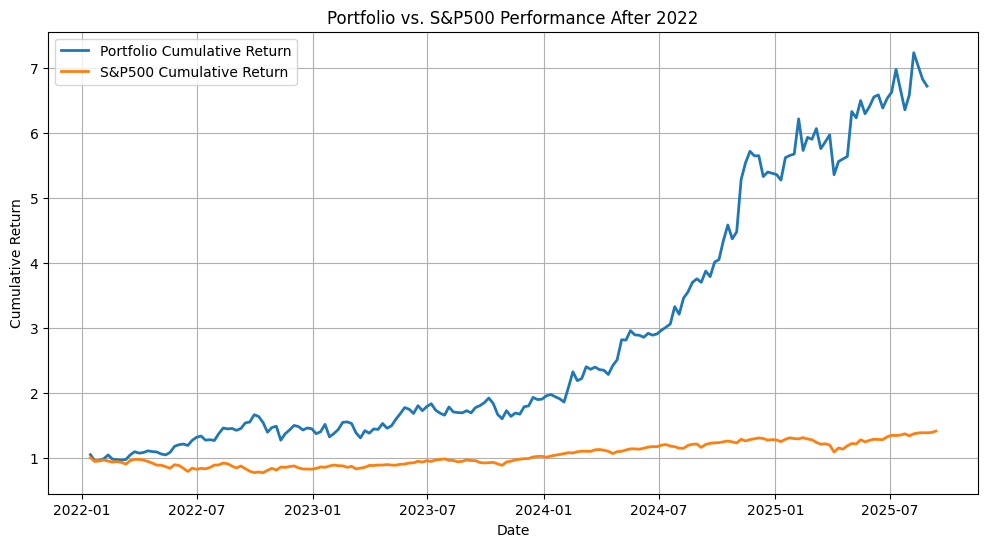

Portfolio final cumulative return: 6.722
Portfolio annualized return (approx.): 65.11%
S&P500 final cumulative return: 1.408
S&P500 annualized return (approx.): 9.32%


In [ ]:

import yfinance as yf


# Fetch S&P500 data from yfinance for dates after 2024-01-01
sp500_ticker = "^GSPC"
sp500_data = yf.download(sp500_ticker, start="2022-01-01")

# Ensure the Date is the index and in datetime format (yfinance already does this)
# Resample to weekly data using Friday as the endpoint
sp500_weekly = sp500_data.resample('W-FRI').last().dropna()

# Compute weekly returns as the percentage change in the 'Close' price
sp500_weekly['Return'] = sp500_weekly['Close'].pct_change()
sp500_weekly = sp500_weekly[['Return']].dropna()

# Compute cumulative returns for the S&P500
sp500_cum_returns = (1 + sp500_weekly['Return']).cumprod()


plt.figure(figsize=(12, 6))

# Plot portfolio cumulative returns
plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio Cumulative Return', linewidth=2)

# Plot S&P500 cumulative returns
plt.plot(sp500_cum_returns.index, sp500_cum_returns, label='S&P500 Cumulative Return', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio vs. S&P500 Performance After 2022')
plt.legend()
plt.grid(True)
plt.show()



def annualize_return(cum_returns, weeks_per_year=50):
    n_weeks = len(cum_returns)
    return (cum_returns.iloc[-1])**(weeks_per_year/n_weeks) - 1

portfolio_annualized = annualize_return(cumulative_returns)
sp500_annualized = annualize_return(sp500_cum_returns)

print(f"Portfolio final cumulative return: {cumulative_returns.iloc[-1]:.3f}")
print(f"Portfolio annualized return (approx.): {portfolio_annualized:.2%}")
print(f"S&P500 final cumulative return: {sp500_cum_returns.iloc[-1]:.3f}")
print(f"S&P500 annualized return (approx.): {sp500_annualized:.2%}")


## Apparently Not :)